## **Phase 2: Exploratory Data Analysis (EDA)**

**Load libraries**

In [1]:
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


**Import and load our cleaned data**

In [2]:
# import our cleaned dataset
df = pd.read_csv("cleaned_easy_visa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# Set our case_id as the index
df.set_index('case_id', inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
case_id,,,,,,,,,,,
EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# Checking for statistical summary
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Separate the numerical from the categorical variables**

In [5]:
df.dtypes

continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

**Numerical Variables**

In [6]:
# Make a list of all the numerical variables
num_col = df.select_dtypes(['float64', 'int64']).columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [7]:
print("Number of numerical variables: ", len(num_col))

Number of numerical variables:  3


**Categorical Variables**

In [8]:
# Make a list of all the categorical variables
cat_col = df.select_dtypes('object').columns
print("Number of numerical variables: ", len(num_col))

# Count of each unique value in each column
for col in cat_col:
  print(df[col].value_counts())
  print("=" * 50)

Number of numerical variables:  3
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


### **Univariate Analysis**

**Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.**

In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### **Observation on each numerical feature**

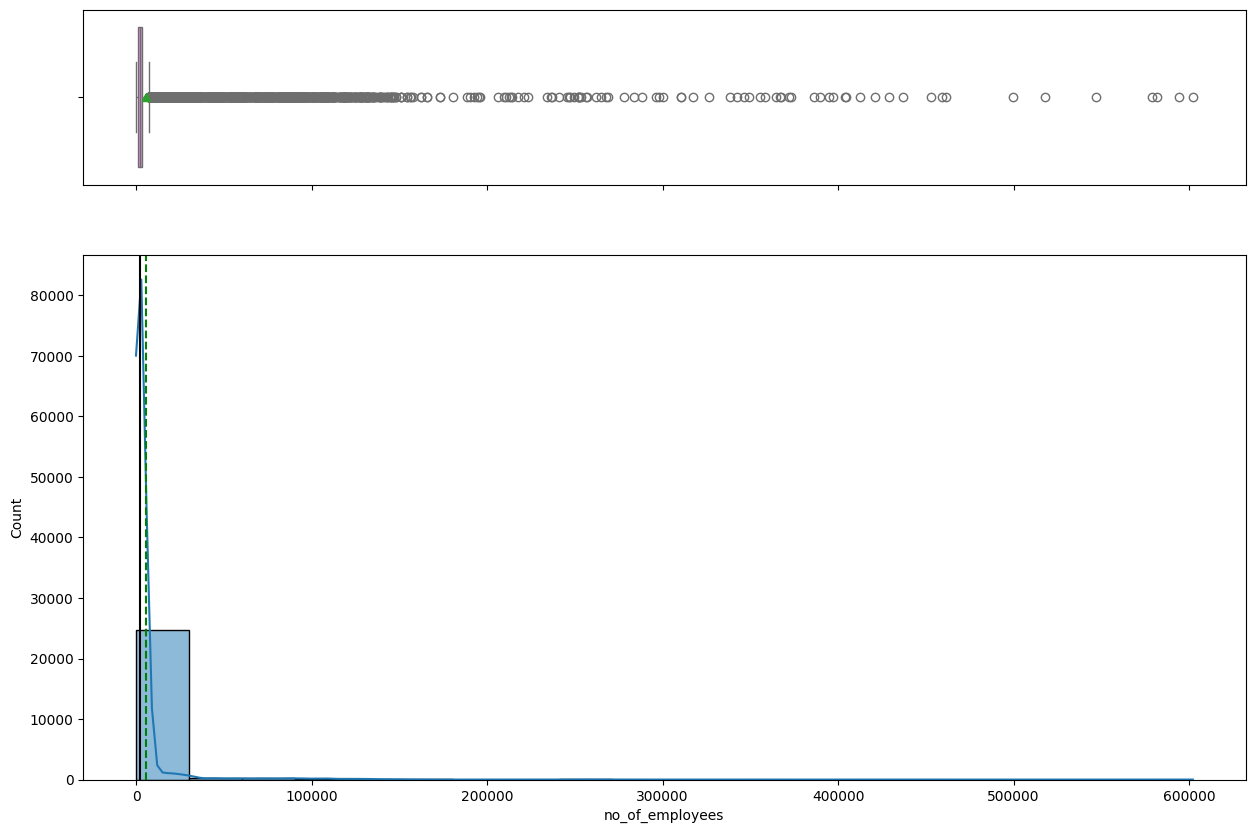

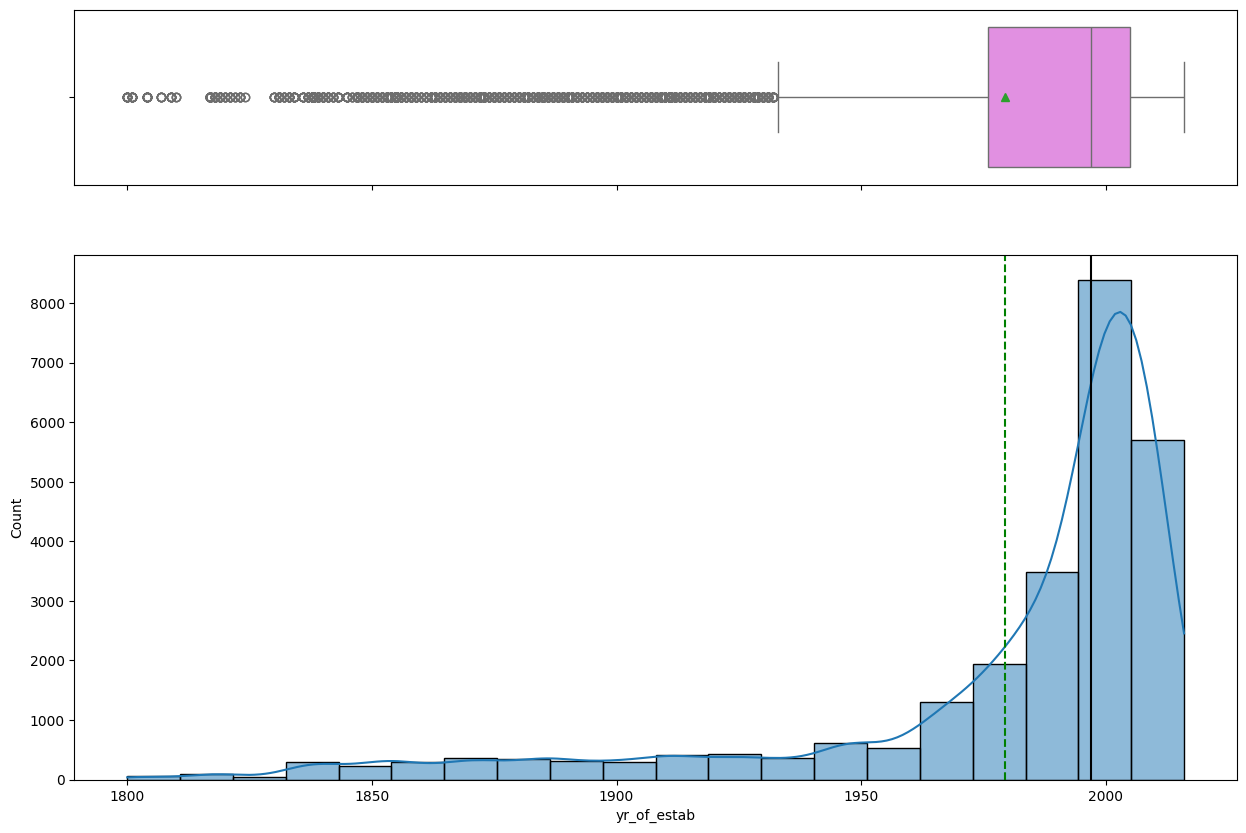

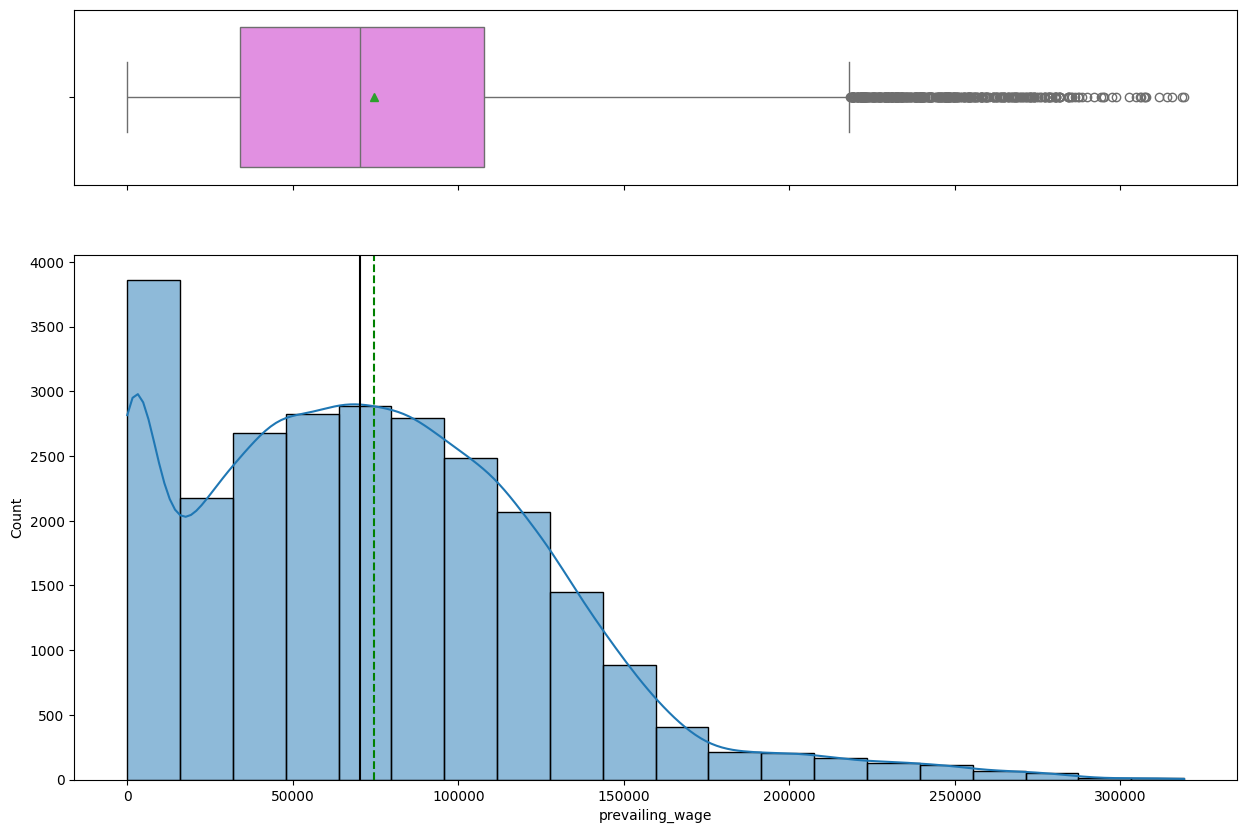

In [10]:
for col in num_col:
  histogram_boxplot(df, col, kde=True, bins=20)

### **Insights from Histogram and Boxplot Visualizations**

### No of employees

- Distribution: The no of employees distribution is highly skewed to the right with high kurtosis indicating there are a higher companies with a number of employees under 40,000, and very few companies with employees above 40,000

- Outliers: There are a larger amount of outliers on the higher end (above 20,000) which might be or may be not be relevant in our data context

### Action

Due to the fact that there are several outliers and it is strongly rightly skewed. We may consider applying log transformation to make the distribution more symmetrical. If outliers are valid, we can consider capping (winsorization) or treated differently to reduce their impact on model training.

### 2. Year of Establishment

- Distribution: The distribution is left-skewed, meaning a positive increase in the establishment of companies from the 1970s to the year 2000.
- Outliers: From the boxplot, there are large number of outliers before the year 1930s which represent inconsistencies in the number of companies.

### Action:

We would consider capping the outliers or investigating further whether these outliers represent a meaningful distinction in our data.

### 3. Prevailing Wage

- Distribution: This feature is rightly skewed, as we have the largest number of employees earning below 20,000, then a number of people earning from 30,000 to 150,000, a smaller number of people earn above 150,000. This indicates the presence of 3 groups, high earners, medium earners and low earners.
- Outliers: Earnings more than 200,000 indicates outliers, which respresent a certain class of employees.

### Action:

We can apply log transformation to make the distribution more symmetrical, which could improve the model performance. The outliers in prevailing wage tell us a different story so we can investigate further whether these outliers represent a meaningful distinction in earnings. We might have to use robust scaler as we do not want to completely remove the outliers.

### **For Categorical Variables**

In [11]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical column.
    Displays frequency table, proportion, and bar/pie charts.
    """
    print(f"\nFeature: {column}")
    print("="*50)

    # Frequency + proportion
    freq = df[column].value_counts(dropna=True)
    prop = df[column].value_counts(normalize=True, dropna=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))
    fig.suptitle(f"Distribution of {column}", fontsize=14, fontweight='bold')

    # Bar Chart
    sns.barplot(
        x=freq.index, 
        y=freq.values, 
        palette='Set2', 
        ax=axes[0], 
        order=freq.index
    )
    axes[0].set_title("Bar Chart")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    axes[1].pie(
        freq.values, 
        labels=freq.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set2', len(freq))
    )
    axes[1].set_title("Pie Chart")

    plt.tight_layout()
    plt.show()


Feature: continent
               Count  Percentage
continent                       
Asia           16861       66.17
Europe          3732       14.65
North America   3292       12.92
South America    852        3.34
Africa           551        2.16
Oceania          192        0.75



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


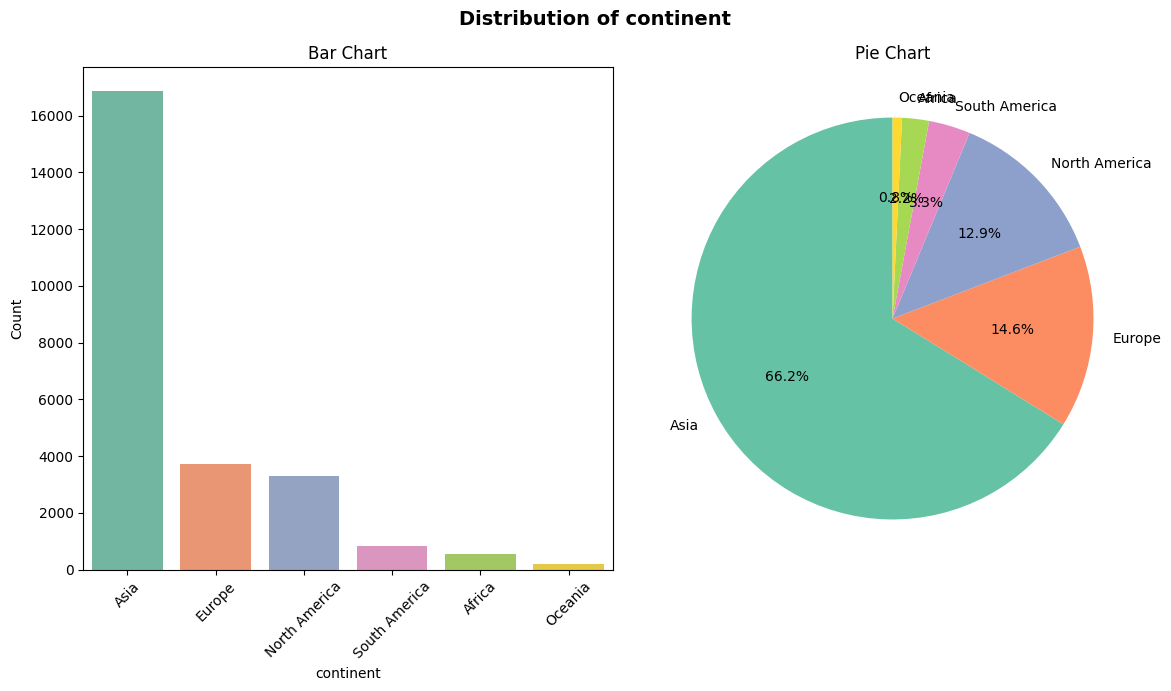


Feature: education_of_employee
                       Count  Percentage
education_of_employee                   
Bachelor's             10234       40.16
Master's                9634       37.81
High School             3420       13.42
Doctorate               2192        8.60



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


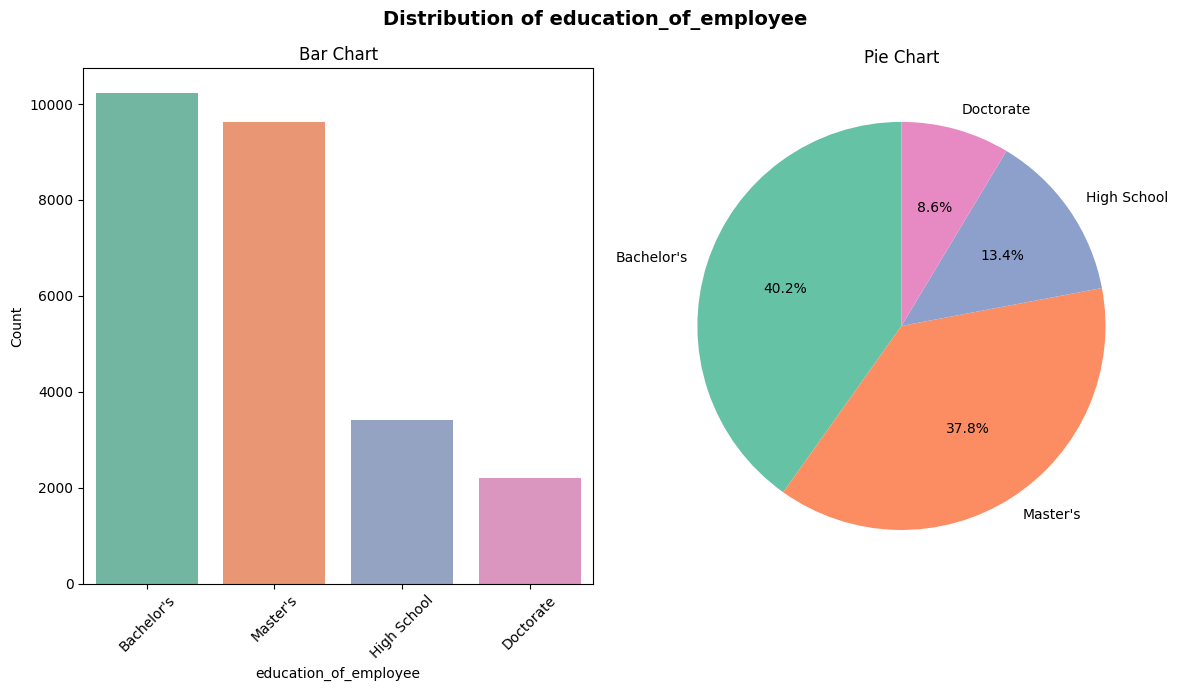


Feature: has_job_experience
                    Count  Percentage
has_job_experience                   
Y                   14802       58.09
N                   10678       41.91



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


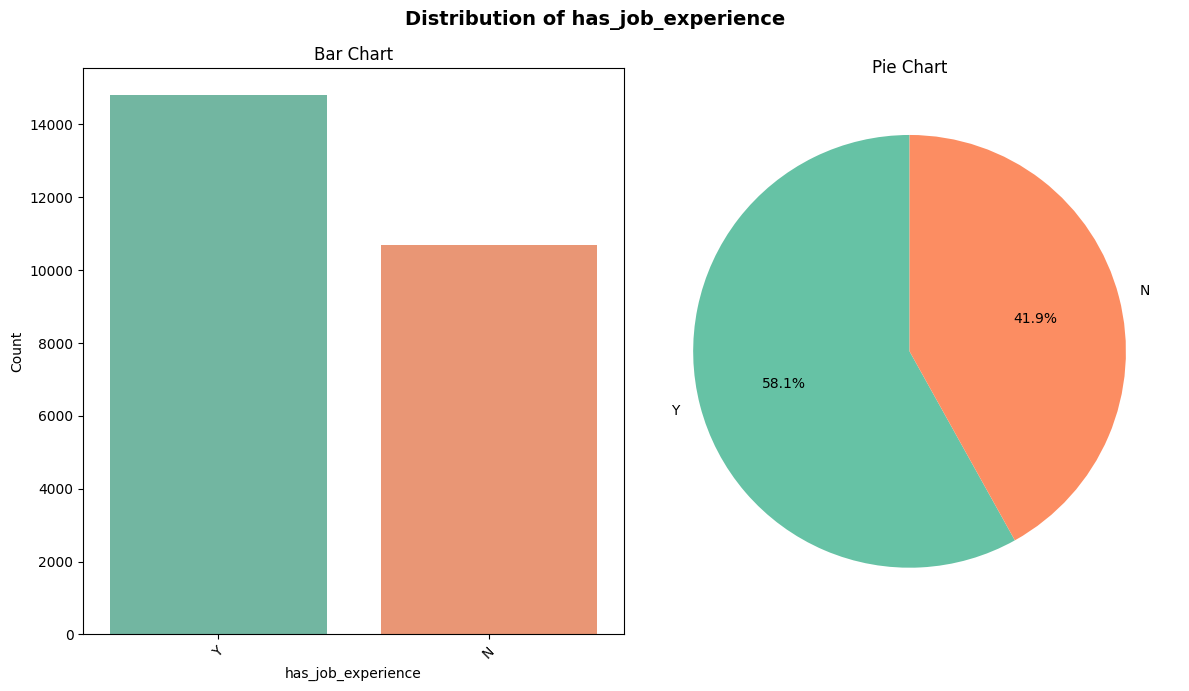


Feature: requires_job_training
                       Count  Percentage
requires_job_training                   
N                      22525        88.4
Y                       2955        11.6



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


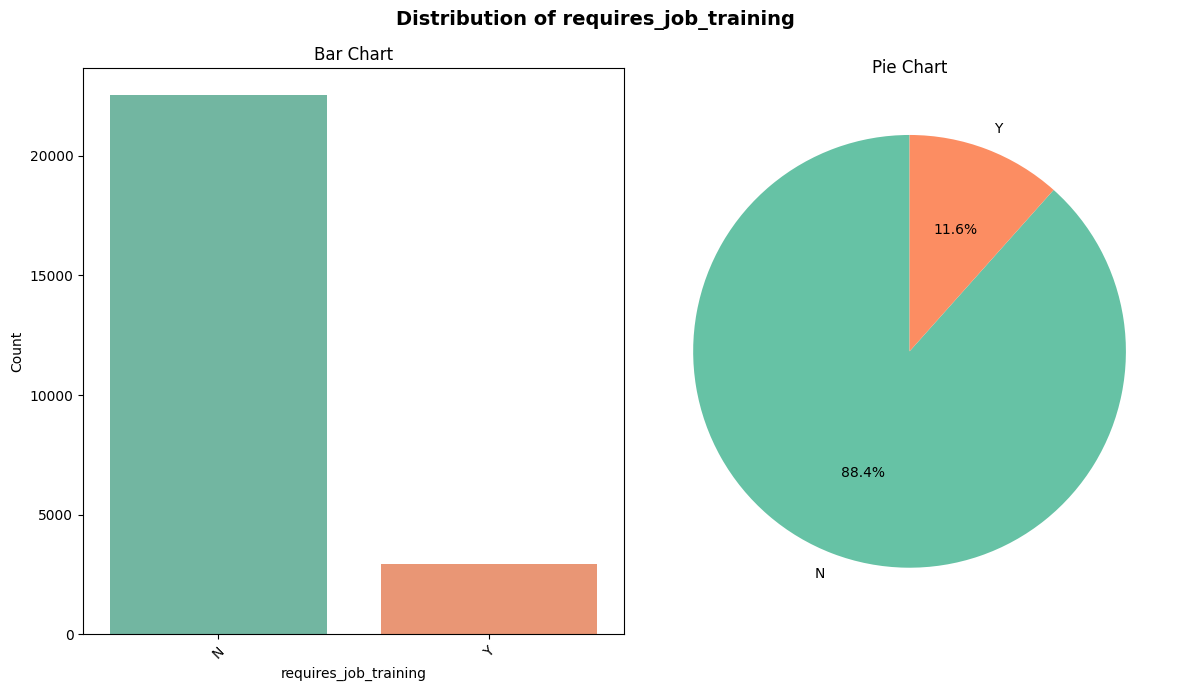


Feature: region_of_employment
                      Count  Percentage
region_of_employment                   
Northeast              7195       28.24
South                  7017       27.54
West                   6586       25.85
Midwest                4307       16.90
Island                  375        1.47



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


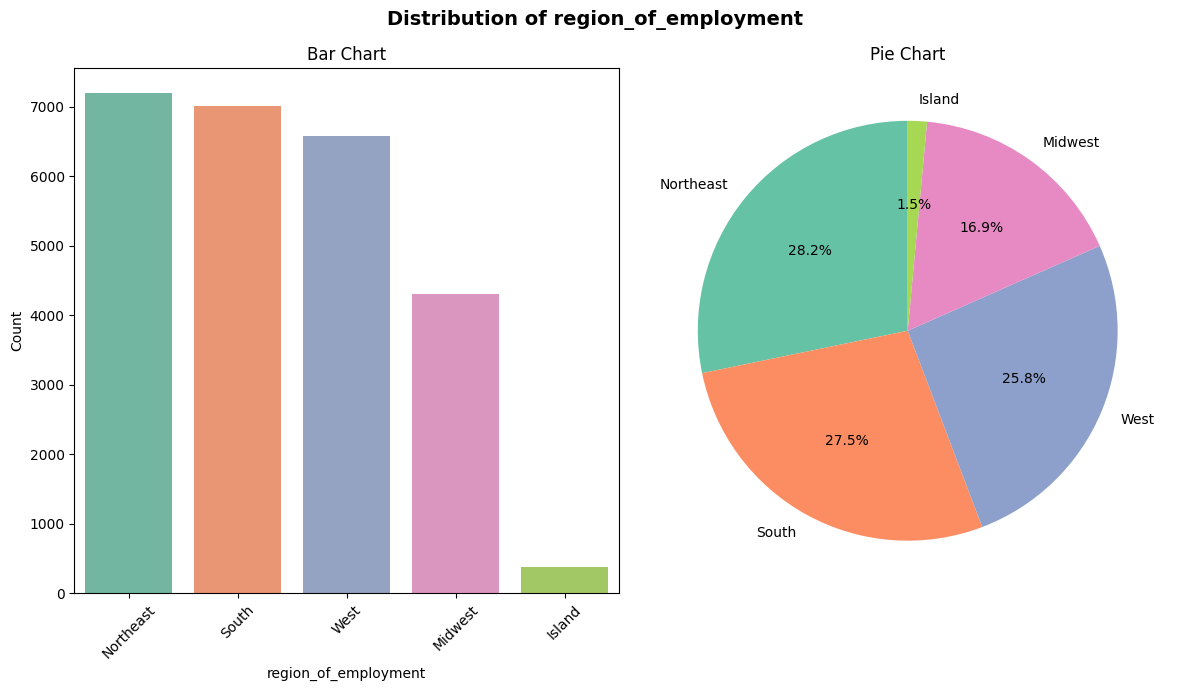


Feature: unit_of_wage
              Count  Percentage
unit_of_wage                   
Year          22962       90.12
Hour           2157        8.47
Week            272        1.07
Month            89        0.35



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


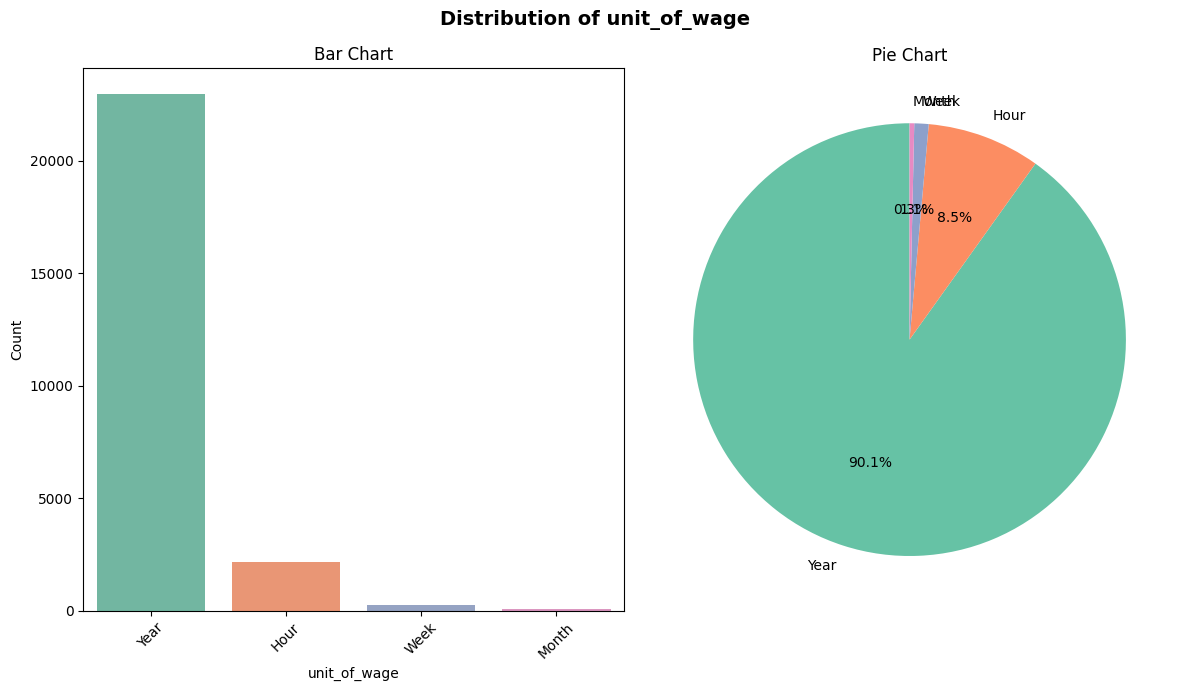


Feature: full_time_position
                    Count  Percentage
full_time_position                   
Y                   22773       89.38
N                    2707       10.62



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


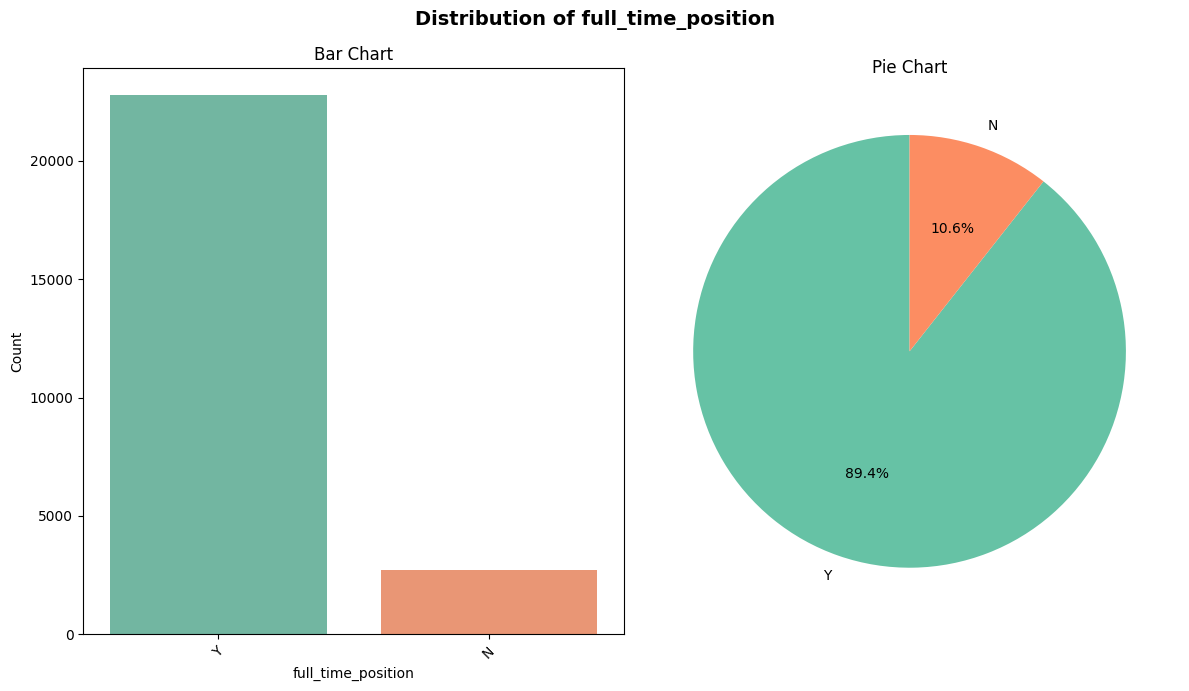


Feature: case_status
             Count  Percentage
case_status                   
Certified    17018       66.79
Denied        8462       33.21



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\668815416.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


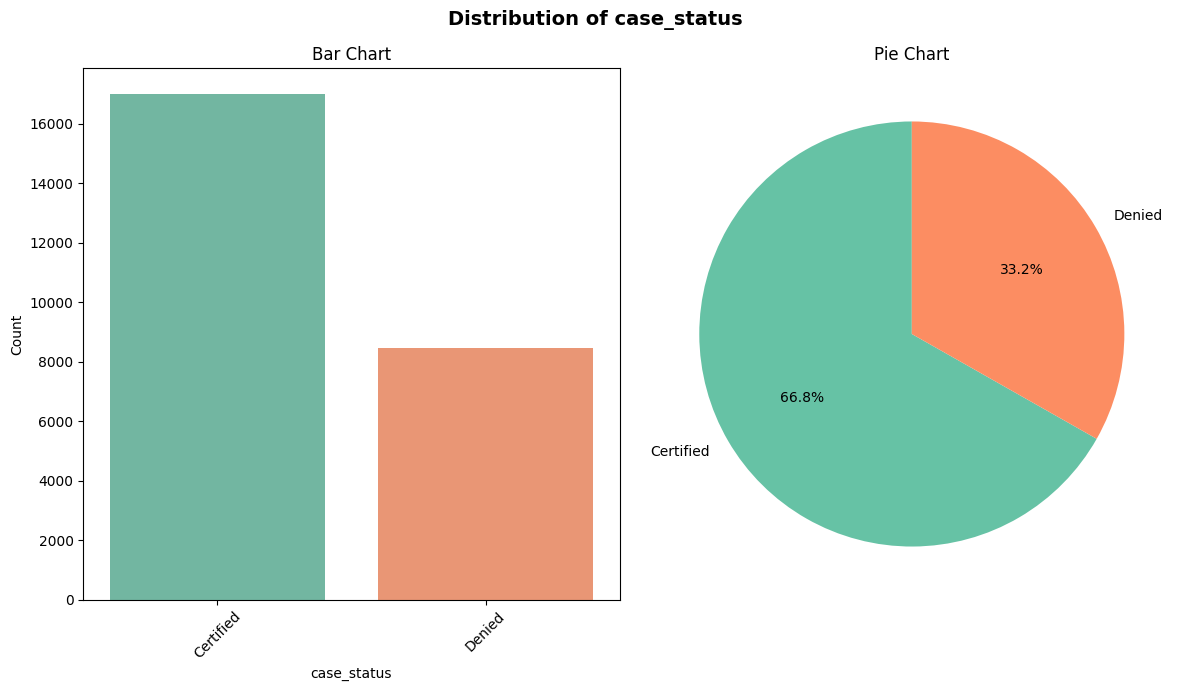

In [12]:
# Using barchart and pie chart for categorical
for col in cat_col:
  univariate_categorical_eda(df, col)

### **Bivariate Analysis**

Numerical to Numerical Analysis

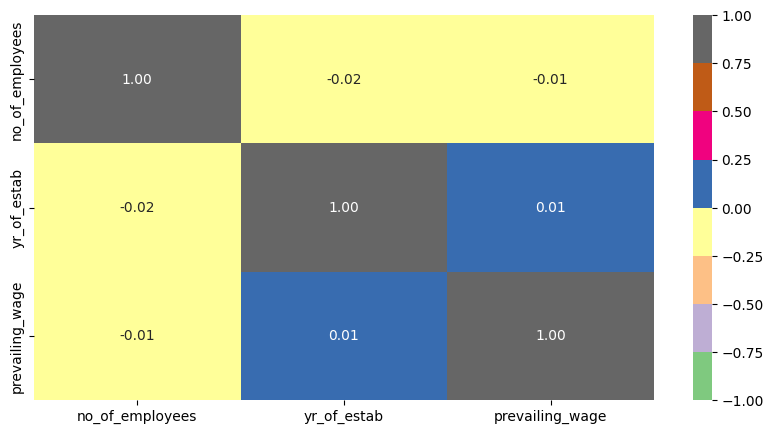

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Accent"
)
plt.show()

In [14]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
  """
  Plots the relationship between two numeric variables with a regression line and displays the correlation coefficient.

  Parameters:
  -----------
  df : pandas.DataFrame
      Dataset containing the numeric columns
  x_col : str
      Name of the first numeric variable (x-axis)
  y_col : str
      Name of the second numeric variable (y-axis)
  """

  # Calculate correlation coefficient
  corr, p_value = pearsonr(df[x_col], df[y_col])

  # Create plot
  plt.figure(figsize=(8, 5))
  sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
  
  # Title and labels
  plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
  plt.xlabel(x_col, fontsize=11)
  plt.ylabel(y_col, fontsize=11)
  plt.grid(alpha=0.3)
  plt.show()


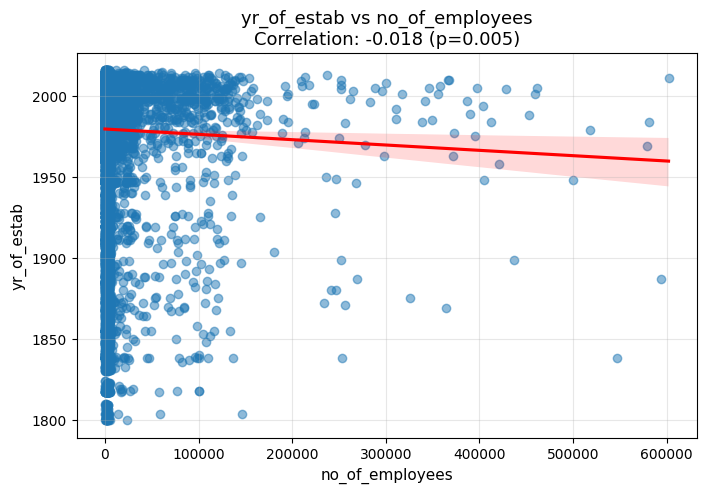

In [15]:
numeric_bivariate_plot(df, 'no_of_employees', 'yr_of_estab')

**Correlation with Target**

In [16]:
df2 = df.copy()

df2['case_status'].replace({'Certified': 1, 'Denied': 0}, inplace=True)

def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\2533718386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['case_status'].replace({'Certified': 1, 'Denied': 0}, inplace=True)
C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\2533718386.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [17]:
df2['case_status'].value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

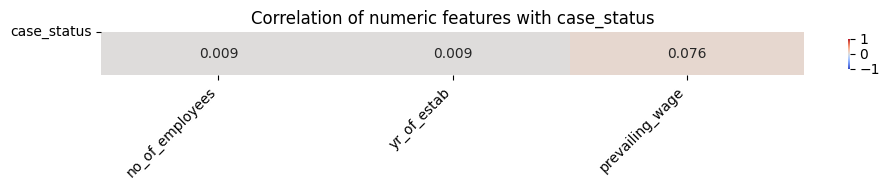

prevailing_wage    0.076198
no_of_employees    0.008677
yr_of_estab        0.008597
dtype: float64


In [18]:
print(correlation_with_target(df2, 'case_status'))

**Numeric-Categorical (Feature vs Target) using boxplot and violin plot**

In [19]:
def bivariate_num_cat(df, feature, target='case_status'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    # Violin plot for distribution shape
    # plt.figure(figsize=(10,5))
    # sns.violinplot(x=target, y=feature, data=df, palette='Set3')
    # plt.title(f'{feature} distribution by {target}', fontsize=13)
    # plt.xlabel(target)
    # plt.ylabel(feature)
    plt.show()


 Feature: no_of_employees vs case_status
                    mean           std   min       max
case_status                                           
Certified    5807.018157  23119.575259 -26.0  602069.0
Denied       5385.538407  22382.755904 -26.0  594472.0



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\48388351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


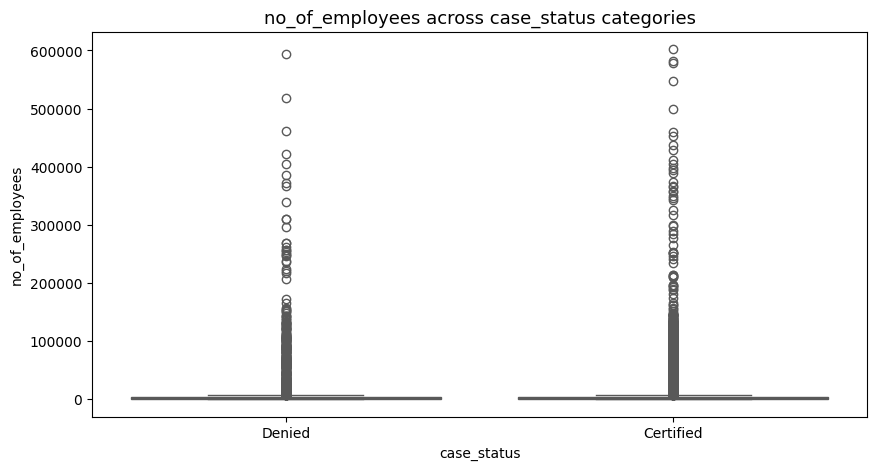

 Feature: prevailing_wage vs case_status
                     mean           std     min        max
case_status                                               
Certified    77293.619243  52042.715576  2.1367  318446.05
Denied       68748.681580  53890.166031  2.9561  319210.27



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\48388351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


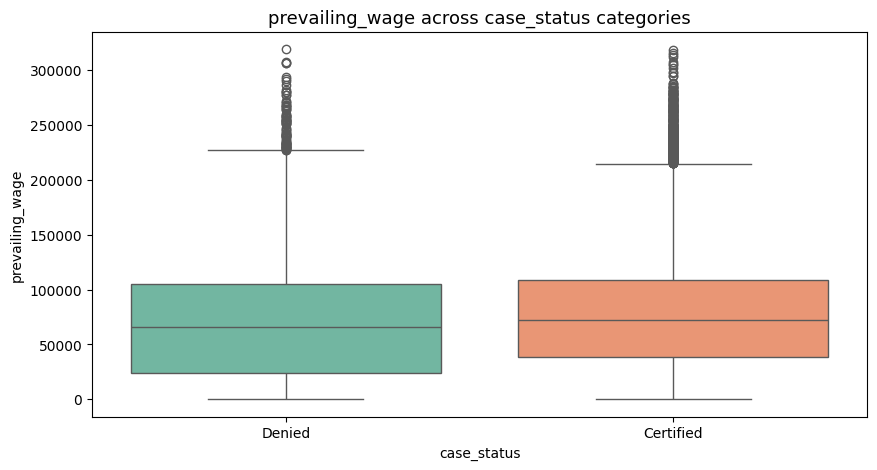

In [20]:
for col in num_col:
    if col != 'yr_of_estab':
        bivariate_num_cat(df, col)

### **Trivariate Analysis with the target as the hue** 

In [21]:
def trivariate_plot(df, x_col, y_col, hue_col='case_status'):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


In [22]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [23]:
df['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25480 entries, EZYV01 to EZYV25480
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.3+ MB


<Figure size 800x600 with 0 Axes>

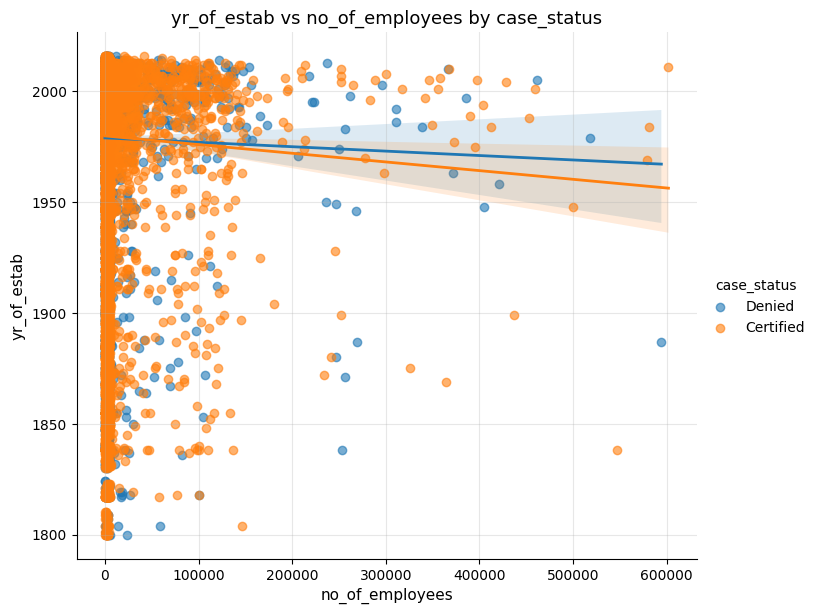

In [25]:
trivariate_plot(df, 'no_of_employees', 'yr_of_estab')

### **Multivariate analysis**

In [26]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by case status.
    """
    summary = df.groupby('case_status').mean(numeric_only=True).round(2)
    return summary


In [27]:
grouped_summary(df)

,no_of_employees,yr_of_estab,prevailing_wage
case_status,,,
Certified,5807.02,1979.67,77293.62
Denied,5385.54,1978.89,68748.68


## Handle Outliers

Using IQR capping

In [28]:
# Outlier treatment based on EDA recommendations
print("=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===")
print("EDA recommended IQR-capping for extreme acidity/sulphates to preserve data points")

# Define numerical columns (excluding target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'quality' in numerical_cols:
    numerical_cols.remove('quality')

print(f"Treating outliers in {len(numerical_cols)} numerical features...")

# Apply IQR-capping method
outliers_capped = 0
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before capping
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    if outliers_before > 0:
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        outliers_capped += outliers_before
        print(f"✓ {col}: Capped {outliers_before} outliers")

print(f"\nTotal outliers capped: {outliers_capped}")
print(f"Dataset shape after outlier treatment: {df.shape}")


=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===
EDA recommended IQR-capping for extreme acidity/sulphates to preserve data points
Treating outliers in 3 numerical features...
✓ no_of_employees: Capped 1556 outliers
✓ yr_of_estab: Capped 3260 outliers
✓ prevailing_wage: Capped 427 outliers

Total outliers capped: 5243
Dataset shape after outlier treatment: (25480, 11)


## EDA Report

### 1. Univariate findings

After handling outliers using outlier capping (winsorization), we have little to no outliers.

 Feature: no_of_employees vs case_status
                    mean          std   min     max
case_status                                        
Certified    2535.646845  1891.578352 -26.0  7227.0
Denied       2413.221461  1837.033400 -26.0  7227.0



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\48388351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


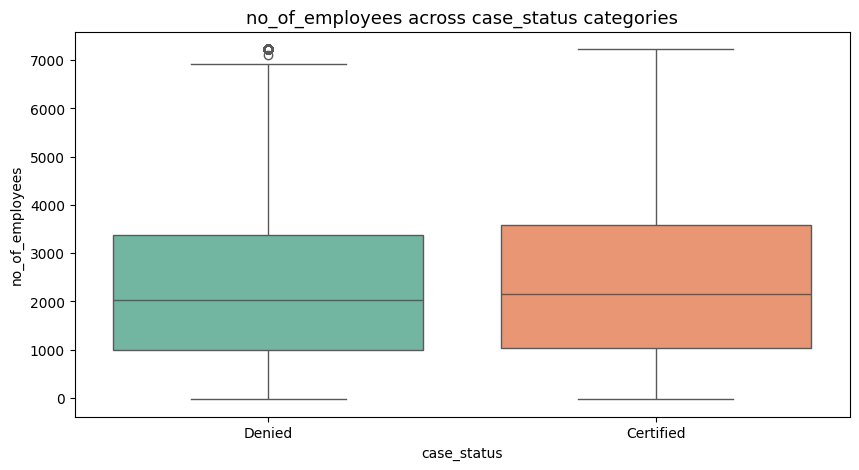

 Feature: yr_of_estab vs case_status
                    mean        std     min     max
case_status                                        
Certified    1986.166676  25.842438  1932.5  2016.0
Denied       1985.535748  25.750675  1932.5  2016.0



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\48388351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


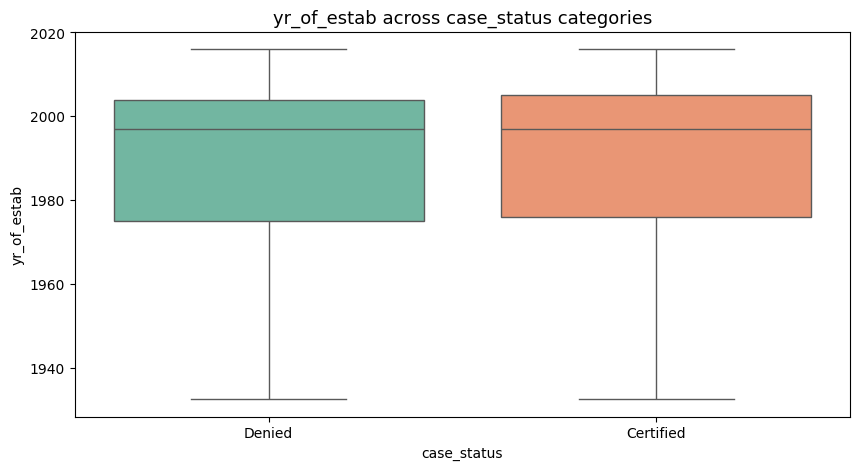

 Feature: prevailing_wage vs case_status
                     mean           std     min           max
case_status                                                  
Certified    76726.924388  50227.461199  2.1367  218315.56125
Denied       68399.575041  52752.691271  2.9561  218315.56125



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_9084\48388351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


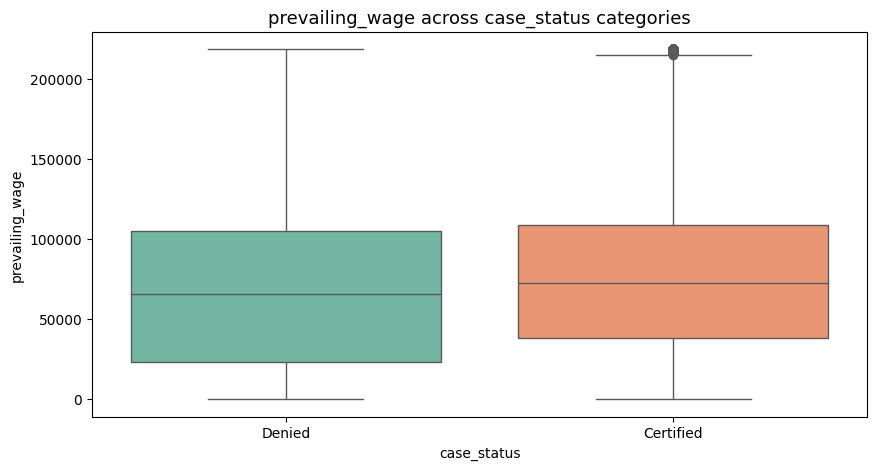

In [29]:
for col in num_col:
  bivariate_num_cat(df, col)

- From our visualization with the boxplot and histogram after handling outliers, shows no outliers in the data.
- The No of Employees is highky skewed on the right, Year of Establishment is skewed on the left and Prevailing wage is skewed on the right as shown in the histogram.

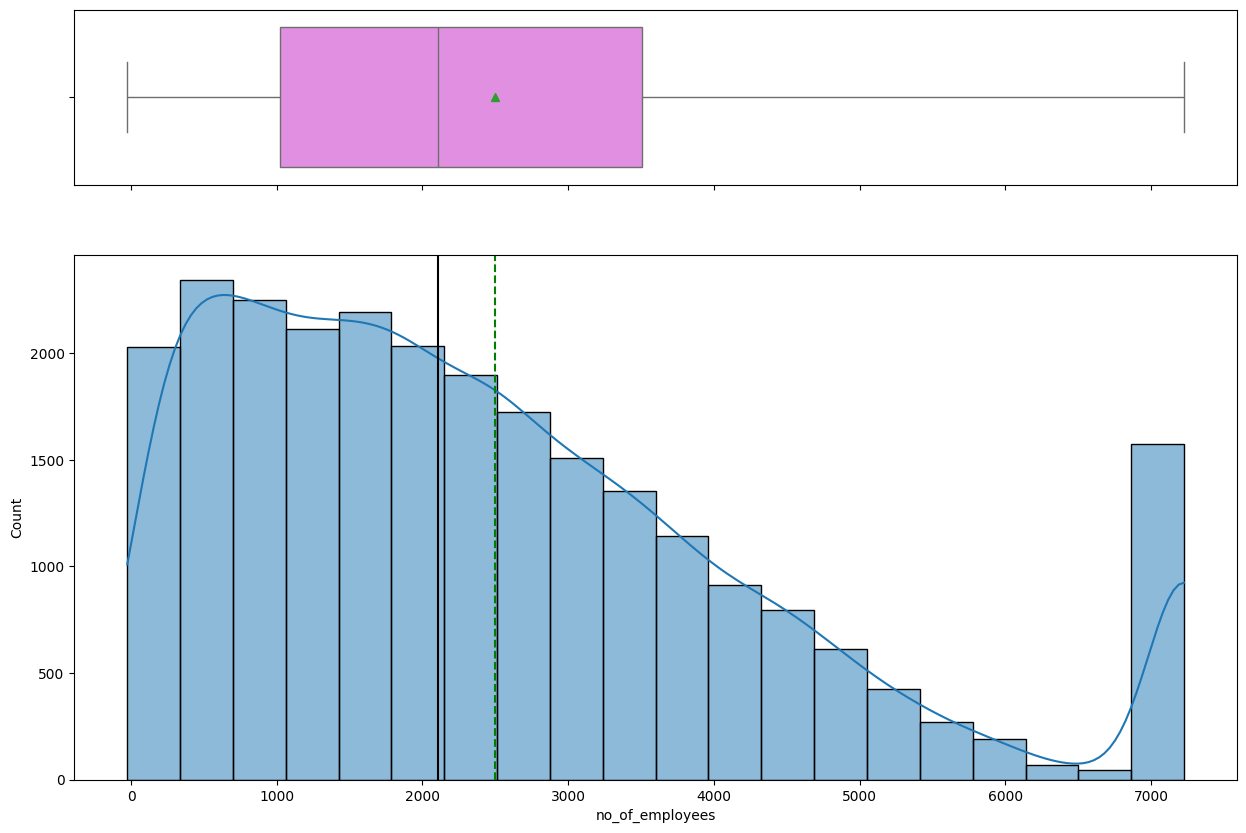

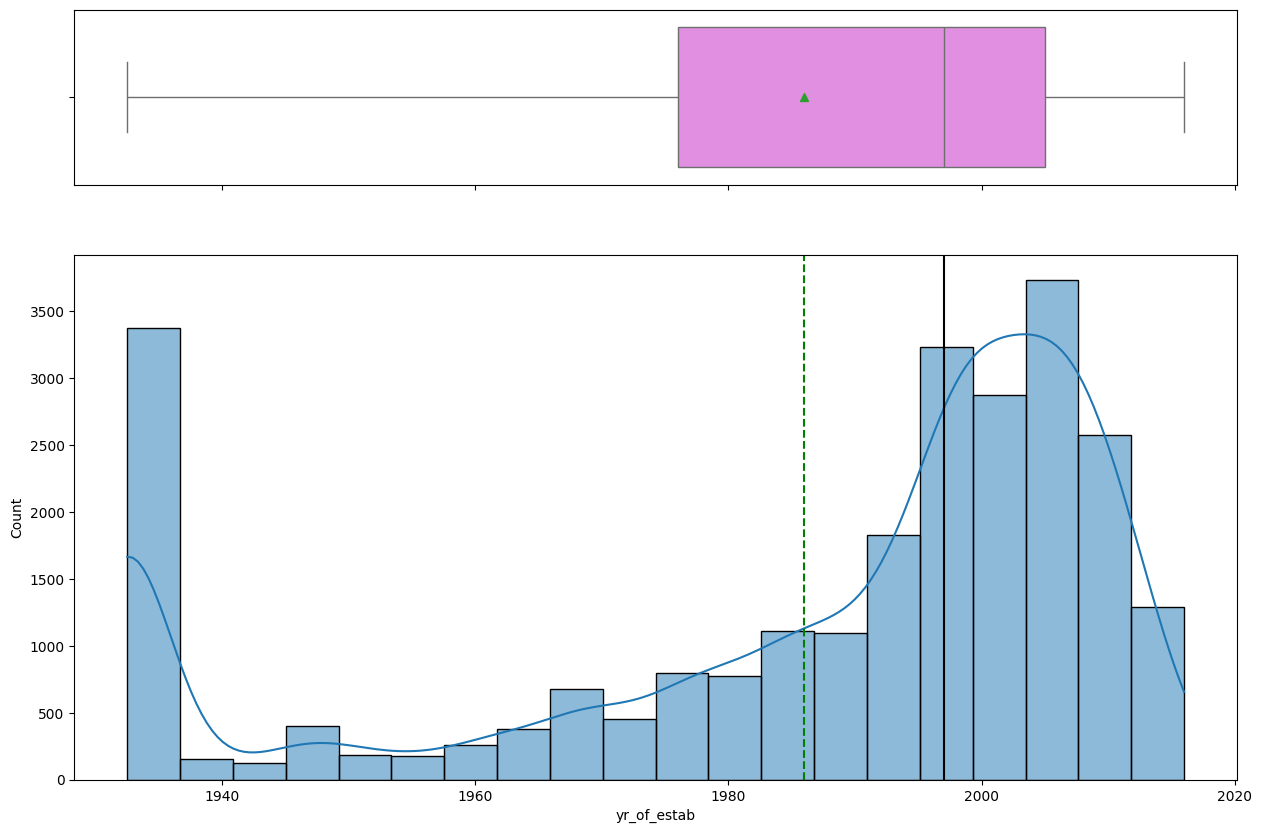

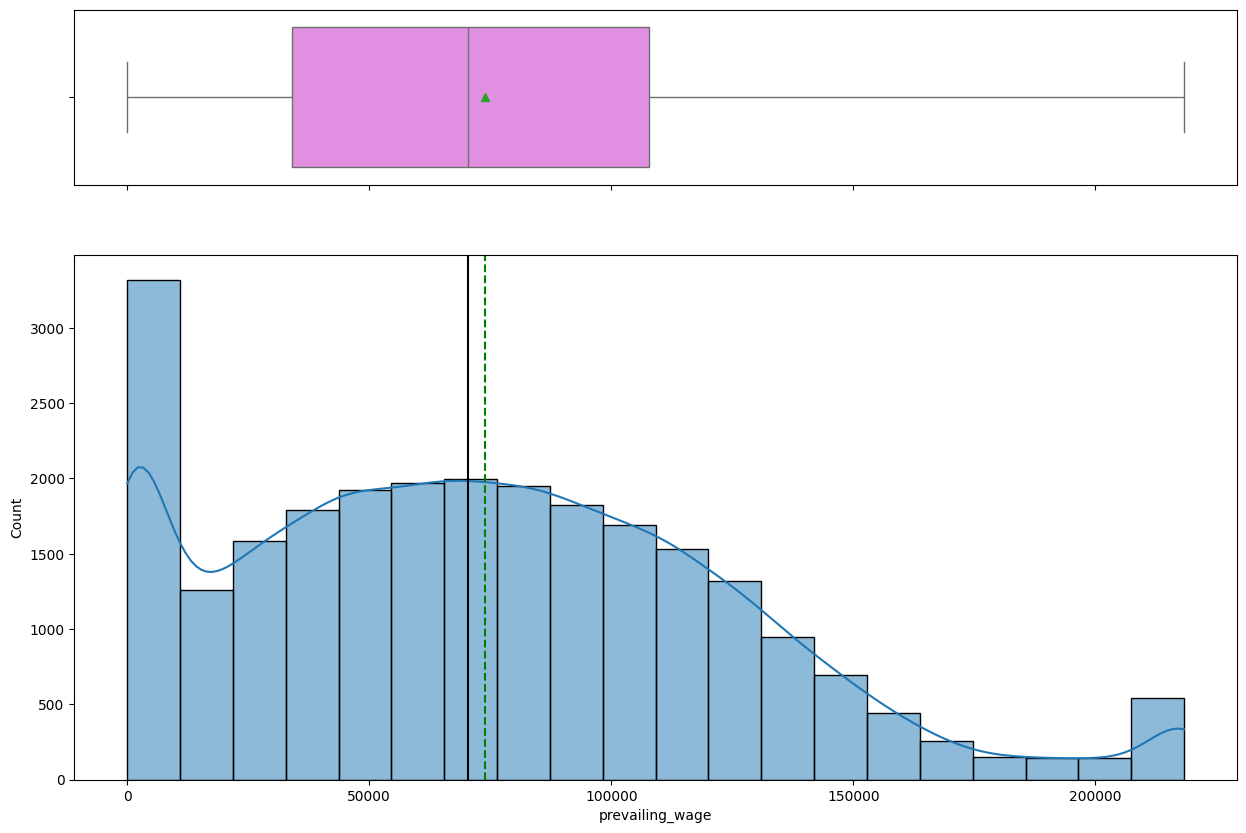

In [30]:
for col in num_col:
  histogram_boxplot(df, col, kde=True, bins=20)

### Recommendations & rationale
1. **Log-transform skewed variables such as no_of_employees, prevailing_wage**
    - *Rationale*: shows unstable variance. Using log transformation reduces influence of extremes and makes the distribution more normal.
    - *Action*: `df['no_of_employees_log'] = np.log1p(df['no_of_employees'])`

### Bivariate findings

**Correlation**: 

Correlation with target resulted in very weak correlation with target (case status). This means all the numeric variables have no correlation with target. Pick the high signal features ranked by correlation

**Feature engineering**

- Transform the year feature to a date time feature

In [31]:
# Save files after EDA
df.to_csv("easy_visa_eda.csv")